In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report


In [5]:
df=pd.read_csv('Heart_Disease .csv')
print(df.dtypes)

age           int64
sex           int64
cp            int64
restbp        int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca           object
thal         object
Diseased      int64
dtype: object


In [6]:
df['ca']=df['ca'].replace(['?'],None)
df['thal']=df['thal'].replace(['?'],None)
df['ca']=pd.to_numeric(df['ca'],errors='coerce')
df['thal']=pd.to_numeric(df['thal'],errors='coerce')
df['ca']=df['ca'].fillna(df['ca'].mean())
df['thal']=df['thal'].fillna(df['thal'].mean())


In [7]:
print(df.dtypes)
print(df.isnull().sum)

age           int64
sex           int64
cp            int64
restbp        int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
Diseased      int64
dtype: object
<bound method NDFrame._add_numeric_operations.<locals>.sum of        age    sex     cp  restbp   chol    fbs  restecg  thalach  exang  \
0    False  False  False   False  False  False    False    False  False   
1    False  False  False   False  False  False    False    False  False   
2    False  False  False   False  False  False    False    False  False   
3    False  False  False   False  False  False    False    False  False   
4    False  False  False   False  False  False    False    False  False   
..     ...    ...    ...     ...    ...    ...      ...      ...    ...   
298  False  False  False   False  False  False    False    False  False   
299  False  False  False   False  False  Fal

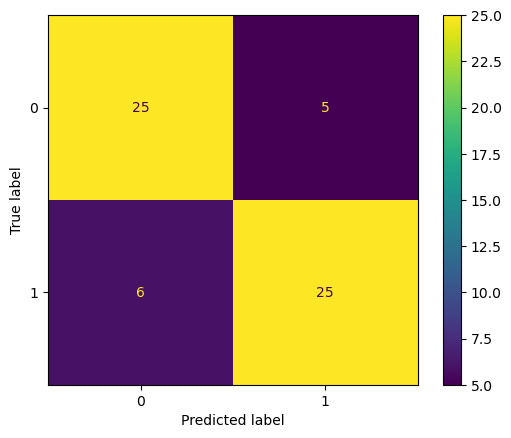

In [ ]:
x=df.drop('Diseased',axis=1)
y=df['Diseased']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)

dt=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10,min_samples_leaf=5,)
dt.fit(x_train,y_train)
ypdt=dt.predict(x_test)
conf=confusion_matrix(ypdt,y_test)
dis=ConfusionMatrixDisplay(confusion_matrix=conf)
dis.plot()
plt.show()


[0.80645161 0.80645161 0.80645161 0.86666667 0.8        0.73333333
 0.63333333 0.63333333 0.7        0.76666667]


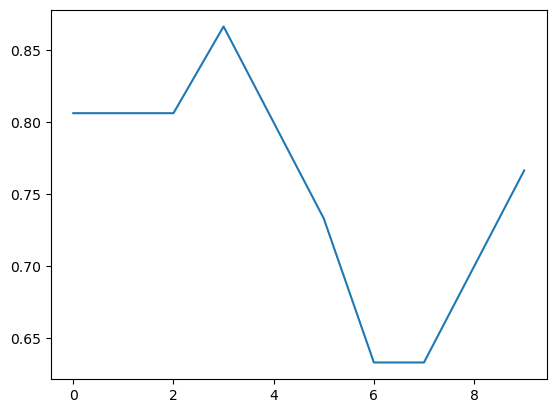

In [12]:
cvs=cross_val_score(dt,x,y,cv=10)
print(cvs)
plt.plot(cvs)
plt.show()

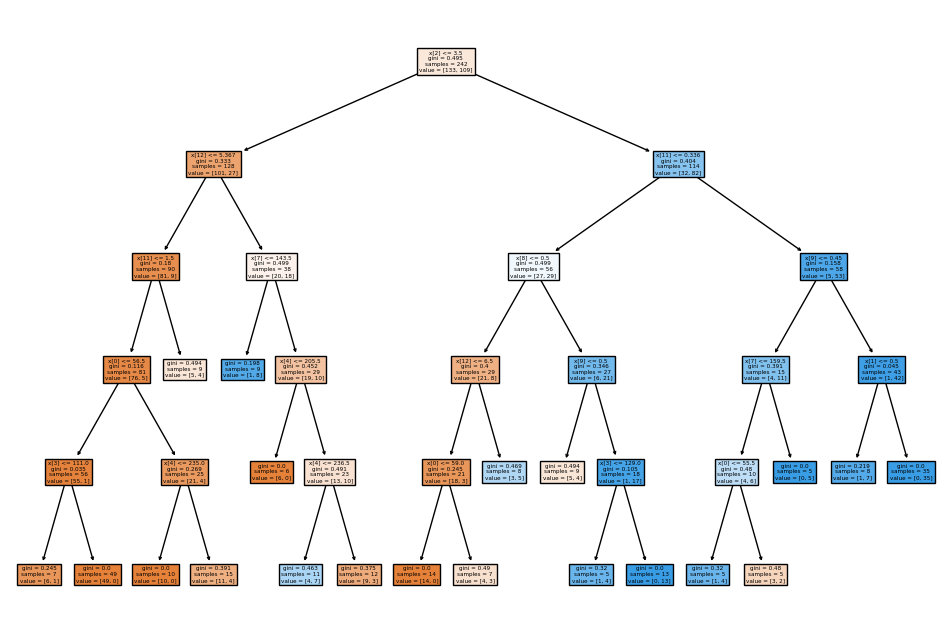

In [23]:
plt.figure(figsize=(12,8))
plot_tree(dt,filled=True)
plt.show()

In [14]:
rf=RandomForestClassifier(criterion='log_loss',random_state=42)
rf.fit(x_train,y_train)
yp=rf.predict(x_test)
fm=rf.feature_importances_
for f,m in zip(x.columns,fm):
    print(f'{f}:{m:.4f}')

age:0.0943
sex:0.0292
cp:0.1085
restbp:0.0867
chol:0.1052
fbs:0.0111
restecg:0.0203
thalach:0.1487
exang:0.0587
oldpeak:0.1044
slope:0.0399
ca:0.0989
thal:0.0939


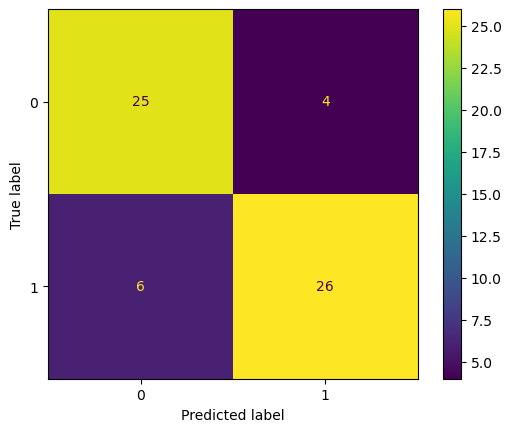

In [15]:
conf=confusion_matrix(yp,y_test)
dis=ConfusionMatrixDisplay(confusion_matrix=conf)
dis.plot()
plt.show()

[0.90322581 0.83870968 0.87096774 0.93333333 0.83333333 0.8
 0.7        0.83333333 0.76666667 0.8       ]


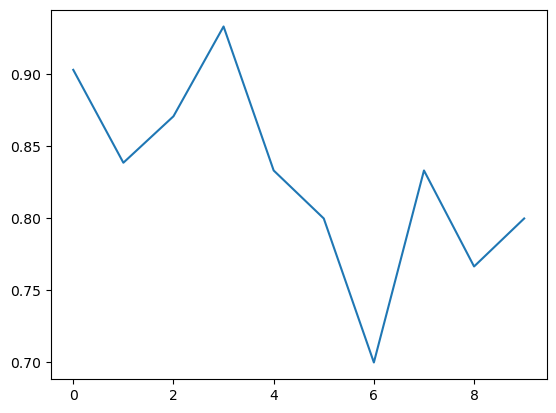

In [16]:
cvs=cross_val_score(rf,x,y,cv=10)
print(cvs)
plt.plot(cvs)
plt.show()

In [17]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        31
           1       0.81      0.87      0.84        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [18]:
param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[5,10,15,None],
    'max_features':['sqrt','log2']
}
gs=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=0)
gs.fit(x_train,y_train)
be=gs.best_estimator_
ypp=be.predict(x_test)
print(classification_report(y_test,ypp))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        31
           1       0.90      0.87      0.88        30

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.89        61
weighted avg       0.89      0.89      0.89        61



In [19]:
op=gs.best_params_
print(op)


{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50}
